/var/folders/23/lg2_ky_16j99q38j63gs6csw0000gn/T/ipykernel_67694/2241570254.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset_loader_rows['Normalized Loader Name'] = self.dataset_loader_rows['Task Name'].apply(lambda name: name.split('/')[0].strip())
/var/folders/23/lg2_ky_16j99q38j63gs6csw0000gn/T/ipykernel_67694/2241570254.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset_loader_rows['Stars'] = self.dataset_loader_rows['Task Name'].apply(lambda task_name: int(task_name.spli

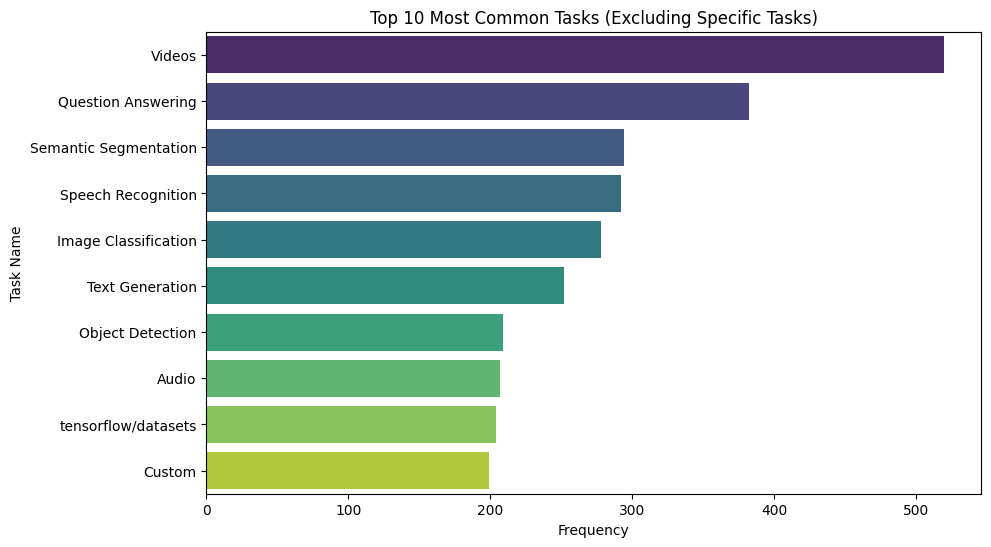

/var/folders/23/lg2_ky_16j99q38j63gs6csw0000gn/T/ipykernel_67694/2241570254.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_grouped_dataset_loaders.values, y=top_10_grouped_dataset_loaders.index, palette="mako")


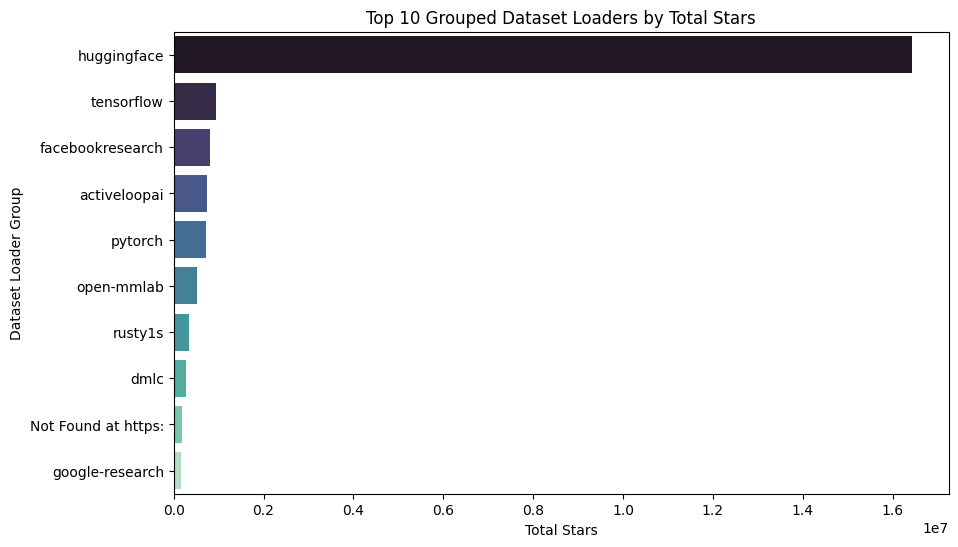

/var/folders/23/lg2_ky_16j99q38j63gs6csw0000gn/T/ipykernel_67694/2241570254.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_benchmark_tasks.values, y=top_10_benchmark_tasks.index, palette="rocket")


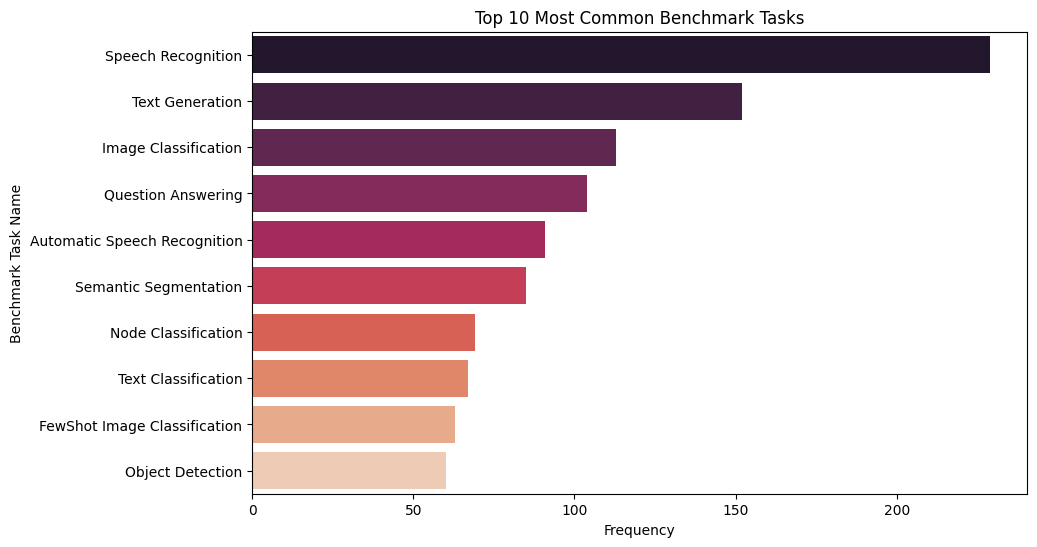

Filtered Task Statistics:
 count    9982.000000
mean        3.473853
std        12.736722
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       520.000000
Name: count, dtype: float64

Grouped Stars Statistics:
 count    1.084000e+03
mean     2.017469e+04
std      5.015556e+05
min      0.000000e+00
25%      2.100000e+01
50%      6.800000e+01
75%      2.242500e+02
max      1.642394e+07
Name: Stars, dtype: float64

Benchmark Task Statistics:
 count    4617.000000
mean        2.234135
std         6.403461
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       229.000000
Name: count, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DatasetAnalysis:
    def __init__(self, file_path):
        # Constructor: Initialize the dataset analysis with the given file path
        self.file_path = file_path
        self.data = pd.read_csv(file_path)
        self.exclude_tasks = ["English", "Unknown", "Images", "Texts", "huggingface/datasets"]

    def preprocess_data(self):
        # Preprocess data by filling missing values and filtering out specific tasks
        self.data['Task Name'] = self.data['Task Name'].fillna('')
        self.filtered_tasks = self.data[~self.data['Task Name'].isin(self.exclude_tasks)]
        self.filtered_tasks = self.filtered_tasks[~self.filtered_tasks['Task Name'].str.contains("huggingface")]

    def visualize_top_tasks(self):
        # Visualize the top 10 most frequent tasks
        filtered_task_counts = self.filtered_tasks['Task Name'].value_counts()
        top_10_filtered_tasks = filtered_task_counts.head(10)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_10_filtered_tasks.values, y=top_10_filtered_tasks.index, palette="viridis")
        plt.title('Top 10 Most Common Tasks (Excluding Specific Tasks)')
        plt.xlabel('Frequency')
        plt.ylabel('Task Name')
        plt.show()

    def preprocess_dataset_loader(self):
        # Preprocess 'Dataset Loader' data for further analysis
        self.dataset_loader_rows = self.data[self.data['Source'] == 'Dataset Loader']
        self.dataset_loader_rows['Normalized Loader Name'] = self.dataset_loader_rows['Task Name'].apply(lambda name: name.split('/')[0].strip())
        self.dataset_loader_rows['Stars'] = self.dataset_loader_rows['Task Name'].apply(lambda task_name: int(task_name.split('-')[-1].strip()) if task_name.split('-')[-1].strip().isdigit() else 0)

    def visualize_dataset_loaders(self):
        # Visualize the top 10 dataset loaders grouped by total stars
        grouped_stars = self.dataset_loader_rows.groupby('Normalized Loader Name')['Stars'].sum().sort_values(ascending=False)
        top_10_grouped_dataset_loaders = grouped_stars.head(10)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_10_grouped_dataset_loaders.values, y=top_10_grouped_dataset_loaders.index, palette="mako")
        plt.title('Top 10 Grouped Dataset Loaders by Total Stars')
        plt.xlabel('Total Stars')
        plt.ylabel('Dataset Loader Group')
        plt.show()

    def visualize_benchmark_tasks(self):
        # Visualize the top 10 most common benchmark tasks
        benchmark_data = self.data[self.data['Source'] == 'Benchmark']
        benchmark_task_counts = benchmark_data['Task Name'].value_counts()
        top_10_benchmark_tasks = benchmark_task_counts.head(10)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_10_benchmark_tasks.values, y=top_10_benchmark_tasks.index, palette="rocket")
        plt.title('Top 10 Most Common Benchmark Tasks')
        plt.xlabel('Frequency')
        plt.ylabel('Benchmark Task Name')
        plt.show()

    def calculate_statistics(self):
        # Calculate and store summary statistics for filtered tasks, dataset loaders, and benchmark tasks
        filtered_task_counts = self.filtered_tasks['Task Name'].value_counts()
        self.filtered_task_stats = filtered_task_counts.describe()

        grouped_stars = self.dataset_loader_rows.groupby('Normalized Loader Name')['Stars'].sum()
        self.grouped_stars_stats = grouped_stars.describe()

        benchmark_data = self.data[self.data['Source'] == 'Benchmark']
        benchmark_task_counts = benchmark_data['Task Name'].value_counts()
        self.benchmark_task_stats = benchmark_task_counts.describe()

    def print_statistics(self):
        # Print the calculated summary statistics
        print("Filtered Task Statistics:\n", self.filtered_task_stats)
        print("\nGrouped Stars Statistics:\n", self.grouped_stars_stats)
        print("\nBenchmark Task Statistics:\n", self.benchmark_task_stats)


# Example usage
analysis = DatasetAnalysis('./paperwithcode.csv')
analysis.preprocess_data()
analysis.preprocess_dataset_loader()  # Preprocess the dataset loader data
analysis.visualize_top_tasks()
analysis.visualize_dataset_loaders()
analysis.visualize_benchmark_tasks()
analysis.calculate_statistics()
analysis.print_statistics()